
## Sesión de Estudio Nª3 WWCode Santiago 

## 1. Contenidos 📘

El objetivo de esta sesión es que te familiaces con los siguientes conceptos:

- Machine Learning
- Feature Selection
- Accuracy
- Overfitting
- Matrix de correlación

## 2. Forma de trabajo 🙊

En esta oportunidad tú serás tu propia speaker, a través de este notebook se te plantearán una serie de ejercicios y pregunta que deberás ir resolviendo. No te preocupes si no alcanzas a terminarlo, es muy probable que hayan más ejercicios de los posibles a hacer durante la jornada. Si tienes dudas o consultas no dudes en preguntar a la monitora de la sesión o a tus propias compañeras, esta instancia está hecha para que entre todas aprendamos algo nuevo


## 3. Introducción al tema 🤖

### Feature selection
Es el proceso que permite selecionar de manera más eficiente aquellos atributos del dataset que efectivamente son necesarios para el modelo y descartar aquellos que solo agregan ruido. Entre las ventajas de aplicar feature selection se encuentra:

- Reducción de Overfitting
- Mejoras en la precisión
- Reducción del tiempo de entrenamiento


Revisamos 6 técnicas diferentes para feature selection, para ello utilizaremos el dataset reducido del desafío **[Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data)** de Kaggle disponible en el repo. Sin embargo, si quieres usar el dataset original te invito a revisar las intrucciones para habilitar la API de Kaggle en tu equipo

> https://github.com/Kaggle/kaggle-api

## 4.Manos al a obra 💪🏻

A continuación Encontrarás celdas de código con instrucciones que debes seguir. De ahora en adelante el desarrollo es 100% tu creatividad, apoyáte de textos y gráficos cuando estimes conveniente. Las preguntas que salen son una guía de lo que debes hacer, pero puedes agregar todo lo que estimes conveniente. Recuerda que tus análisis no siempre los revisan personas expertas y todos debens ser capaces de seguir tu lógica.


**_Mucho éxito 🙌 !!_**


### 1. Carga de datos

In [1]:
#importa las librerías necesarias para tu trabajo
import pandas as pd

In [65]:
#input de datos.
#crea una variable llamada datos que lea el archivo application_train_lite.csv
data = pd.read_csv('application_train_lite.csv')
data.head(3)

,Unnamed: 0,Unnamed: 0.1,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,100002,1,Cash loans,M,N,Y,0,202500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,100003,0,Cash loans,F,N,N,0,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Revisión del dataset

#### 2.1 Descripción general

In [6]:
#Acá debes responder a las preguntas tipo:
#Cuantás columnas tiene el dataset?Cuántas filas?
#Cual es la variable objetivo? Spoiler:target.
#Esta variables es categórica?Es data desbalanceada?
#La variable es numérica?, tiene patrones de comportamiento?, es muy dispersa?
data.shape
data.dtypes

Unnamed: 0                      int64
Unnamed: 0.1                    int64
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PH

In [18]:
data.shape

(153756, 124)

In [34]:
data.head(5)

,Unnamed: 0,Unnamed: 0.1,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,100002,1,Cash loans,M,N,Y,0,202500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,100003,0,Cash loans,F,N,N,0,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,100006,0,Cash loans,F,N,Y,0,135000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,100007,0,Cash loans,M,N,Y,0,121500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data.isnull().sum()

Unnamed: 0                         0
Unnamed: 0.1                       0
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        8
AMT_GOODS_PRICE                  129
NAME_TYPE_SUITE                  628
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   101531
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
F

In [11]:
data.nunique()

Unnamed: 0                    153756
Unnamed: 0.1                  153756
SK_ID_CURR                    153756
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                      13
AMT_INCOME_TOTAL                1613
AMT_CREDIT                      4689
AMT_ANNUITY                    11957
AMT_GOODS_PRICE                  736
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
REGION_POPULATION_RELATIVE        80
DAYS_BIRTH                     17260
DAYS_EMPLOYED                  10925
DAYS_REGISTRATION              14792
DAYS_ID_PUBLISH                 6051
OWN_CAR_AGE                       57
FLAG_MOBIL                         2
FLAG_EMP_PHONE                     2
FLAG_WORK_PHONE                    2
F

#### 2.2 Tratamiento de missing

In [48]:
#Análisis del dataset
#Cuántas variables categoricas hay?Cuántas numéricas?
#Cuál es el % de datos missing?
#Genera imputación de missing. Apóyate de Imputer de SkLeark

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153756 entries, 0 to 153755
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 143.1+ MB


In [50]:
var_numerica = []
var_categorica = []

for i in data.columns.tolist():
    if data[i].dtype =='object':
        var_categorica.append(i)
    else:
        var_numerica.append(i)

In [51]:
print (len(var_numerica))
print (len(var_categorica))

106
16


In [52]:
data = data.dropna()

In [8]:
#Análisis del dataset
#Cuántas variables categoricas hay?Cuántas numéricas?
#Cuál es el % de datos missing?
#Genera imputación de missing. Apóyate de Imputer de SkLeark


In [ ]:
#imputer de sklearn

In [35]:
#borrar columnas auto-generadas
del data['Unnamed: 0']
del data['Unnamed: 0.1']

In [31]:
col_names = data.columns.tolist()
missing_per_att = {}
for column in col_names:
    nulls = data[column].isnull().sum()
    if ( nulls > 0):
        missing_per_att[column] = nulls
        #print ("<{0}>: {1}".format(column, float(data[column].isnull().sum()/153756))  )

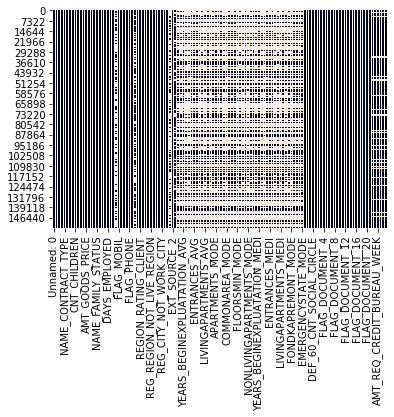

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull(), cbar=False)

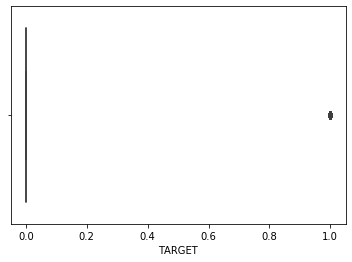

In [38]:
sns.boxplot(data=data, x = 'TARGET')
#la variable es categorica

In [41]:
data.groupby('TARGET')['SK_ID_CURR'].count()

TARGET
0    141215
1     12541
Name: SK_ID_CURR, dtype: int64

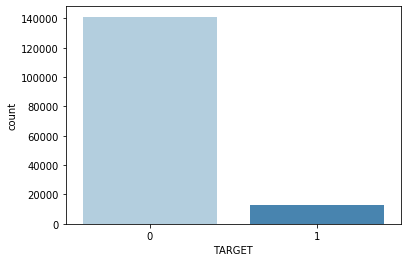

In [45]:
sns.countplot(data=data, x='TARGET', palette ='Blues')

### 3. Feature Selection

#### 3.1 Ningún Criterio

Para probar la efectividad de feature selection primero se entrenará un modelo con todos los campos y su accuracy se tomará como base. Al final de cada criterio de feature selection se volverá a entrenar el mismo modelo, con el fin de evaluar cambios en su performance

In [66]:
#Entrena tu modelo favorito (evita usar el automodel). 
#Si no tienes ninguno en mente puedes usar un arbol de decisión simple.
#Nota. si sientes que tienes buen manejo de código, podrías escribir un método
#Donde entregues el dataset y retorne el accuracy.


#vamos a entrenar un modelo de clasificacion pq la variable es categorica para predecir la variable TARGET
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_cols = []
x = data.copy()
y = data['TARGET']
del x['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [20]:
#1.Elige 3 criterios de los anteriores, revisa en internet para escribir una breve
#definición y realiza un primer feature selection.
#2.Indica qué variables quedaron fuera y revisa cuánto cambia el accuracy de tu 
#modelo


#Tip: Alabado sea SKlearn, con el nada te faltará

#### 3.3 Wrapper-based Method
Están basado en algoritmos de búsqueda que van evaluando todas las posibles combinaciones de variables y seleccionan aquella que produce el mejor resultado de predicción


##### **3.2.1 Forward Search**
Inicialmente considera la performance con cada una de las variables de manera separada.La que tenga mejor resultado será considerada como variable inicial y sobre esta se genera la combinatoria de búsqueda.


##### **3.2.2 Backward Search**
Este método comienza entrenando con todas las variables ingresadas y va eliminando en la medida que sube la performance

##### **3.2.3 Recursive Feature Elimination**
Similar a un modelo de optimización, busca encontrar el conjunto de variables que maximice el rendimiento del modelo. Para lograr dicho objetivo, crea modelos de forma iterativa, dejando de lado las variables con mejores y peores resultados (es decir, deja las que tienen un rendimiento equilibrado)


In [21]:
#1.Elige 1 criterios de los anteriores y realiza un segundo feature selection.
#2.Indica qué variables quedaron fuera y revisa cuánto cambia el accuracy de tu 
#modelo


#Tip: Alabado sea SKlearn, con el nada te faltará

#### 3.4 Embedded Method
Son algoritmos que usan su propio criterio de selección de variables. Acá encontramos algunos clásicos como Lasso y Random Forest. En el caso de Lasso, este modelo generalmente fuerza a algunas variables a que tengan pesos equivalente a cero, dejando nulo el impacto de estas en la predicción. Por otro lado, el Random Forest una vez entrenado permite hacer un análisis de importancia. También se puede usar GBM.


In [22]:
#1.Elige 1 criterios de los anteriores
#2.Haz una pequeña búsqueda bibliográfica para definir con tus palabras en qué consiste
#cada método. Si te sientes muy perdida pide referencias a la monitora.
#3.Entrena el modelo seleccionado con la data pura
#4.Entrena el modelo selccionado con alguna feature selection anterior.


#Tip: Alabado sea SKlearn, con el nada te faltará

#### 4 Conclusiones y tips

In [23]:
#Completa esta sección con las cosas más importantes 
#que aprendiste durante el proceso